In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import pandas as pd

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.ensemble import RandomForestClassifier


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [13]:
from xgboost import XGBClassifier

In [14]:
df=pd.read_csv("smoking.csv")


In [15]:
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [16]:
df.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [18]:
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


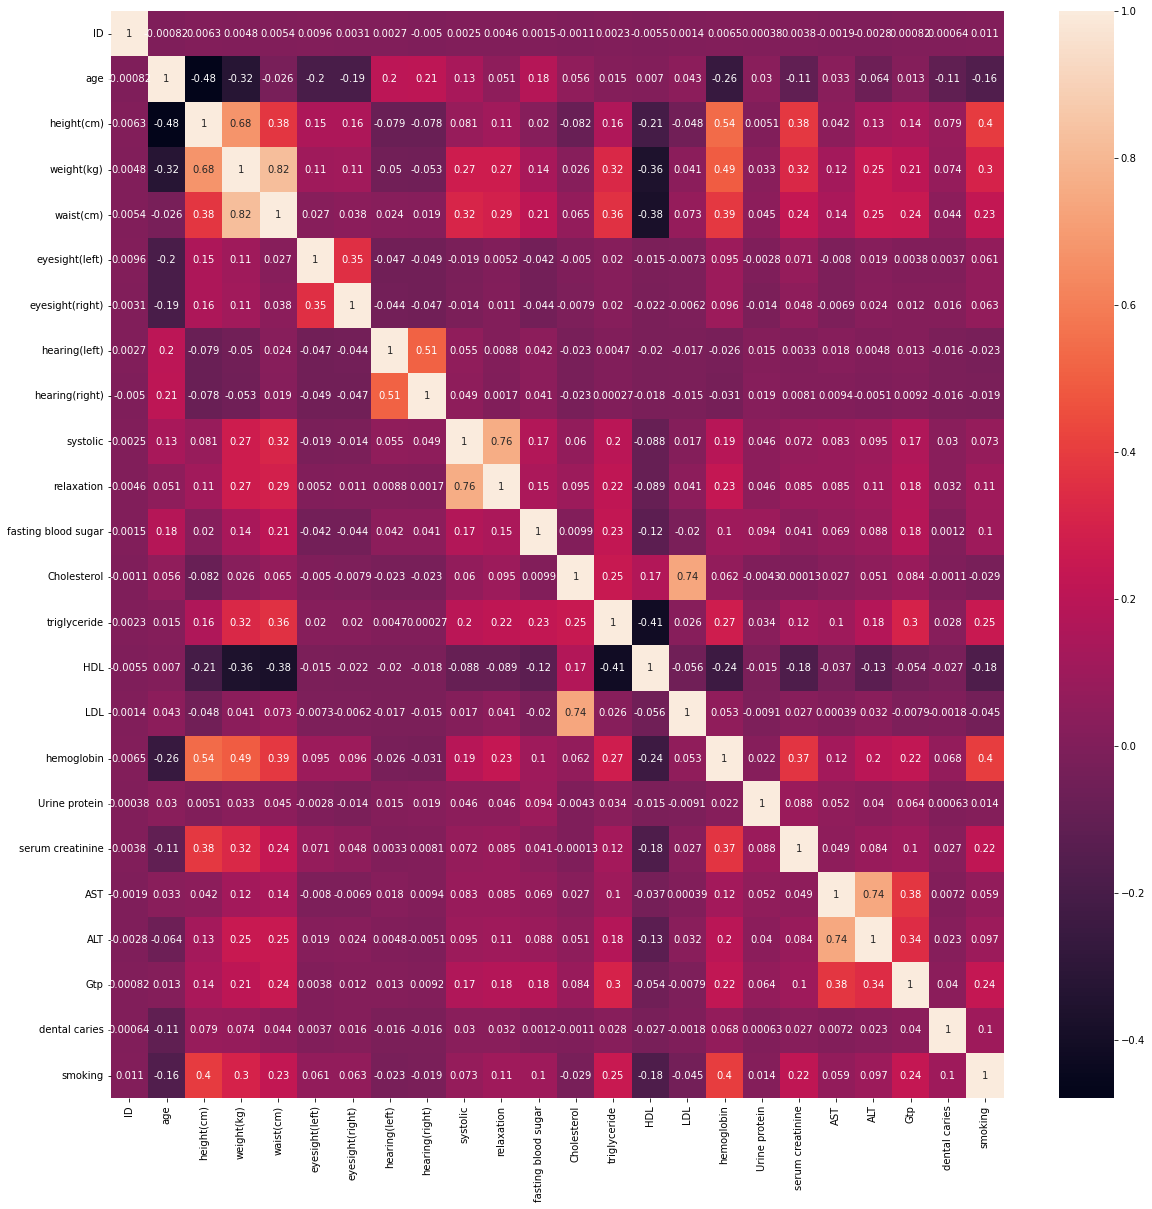

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

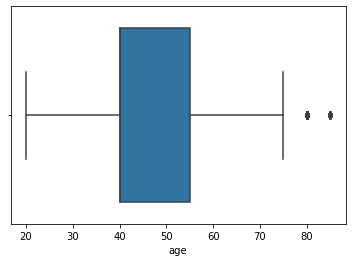

In [20]:
sns.boxplot(df['age'])

In [21]:
q1=df['age'].quantile(0.25)

In [22]:
q3=df['age'].quantile(0.75)

In [23]:
IQR=q3-q1

In [24]:
lower=q1-1.5*IQR

In [25]:
higher=q3+1.5*IQR

In [26]:
df=df[(df['age']>lower) & (df['age']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

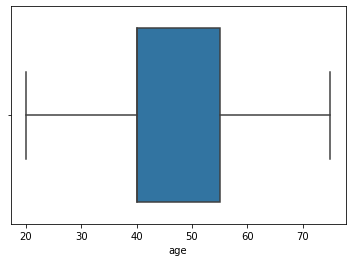

In [27]:
sns.boxplot(df['age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height(cm)'>

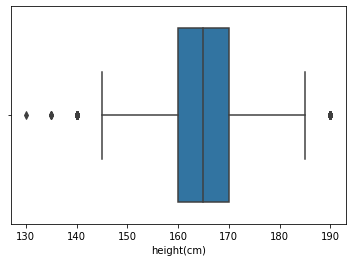

In [28]:
sns.boxplot(df['height(cm)'])

In [29]:
q1=df['height(cm)'].quantile(0.25)

In [30]:
q3=df['height(cm)'].quantile(0.75)

In [31]:
IQR=q3-q1

In [32]:
lower=q1-1.5*IQR

In [33]:
higher=q3+1.5*IQR

In [34]:
df=df[(df['height(cm)']>lower) & (df['height(cm)']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height(cm)'>

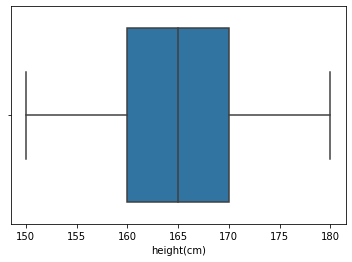

In [35]:
sns.boxplot(df['height(cm)'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight(kg)'>

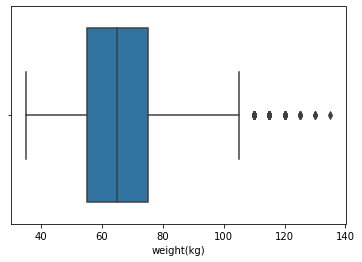

In [36]:
sns.boxplot(df['weight(kg)'])

In [37]:
q1=df['weight(kg)'].quantile(0.25)

In [38]:
q3=df['weight(kg)'].quantile(0.75)

In [39]:
IQR=q3-q1

In [40]:
lower=q1-1.5*IQR

In [41]:
higher=q3+1.5*IQR

In [42]:
df=df[(df['weight(kg)']>lower) & (df['weight(kg)']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight(kg)'>

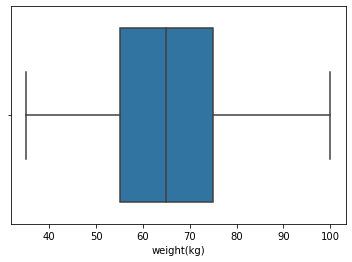

In [43]:
sns.boxplot(df['weight(kg)'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='waist(cm)'>

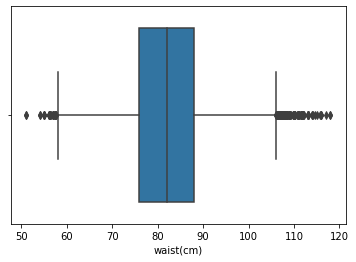

In [44]:
sns.boxplot(df['waist(cm)'])

In [45]:
q1=df['waist(cm)'].quantile(0.25)

In [46]:
q3=df['waist(cm)'].quantile(0.75)

In [47]:
IQR=q3-q1

In [48]:
lower=q1-1.5*IQR

In [49]:
higher=q3+1.5*IQR

In [50]:
df=df[(df['waist(cm)']>lower) & (df['waist(cm)']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='waist(cm)'>

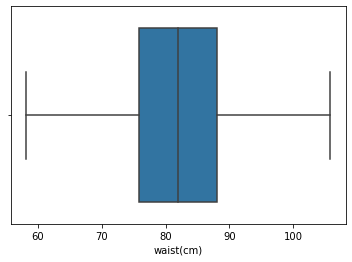

In [51]:
sns.boxplot(df['waist(cm)'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='systolic'>

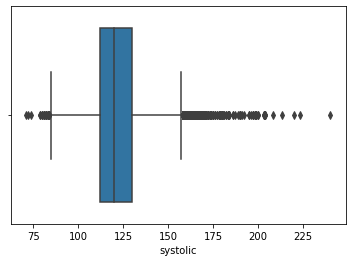

In [52]:
sns.boxplot(df['systolic'])

In [53]:
q1=df['systolic'].quantile(0.25)

In [54]:
q3=df['systolic'].quantile(0.75)

In [55]:
IQR=q3-q1

In [56]:
lower=q1-1.5*IQR

In [57]:
higher=q3+1.5*IQR

In [58]:
df=df[(df['systolic']>lower) & (df['systolic']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='systolic'>

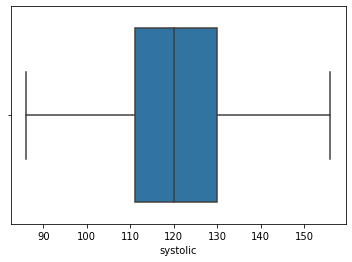

In [59]:
sns.boxplot(df['systolic'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HDL'>

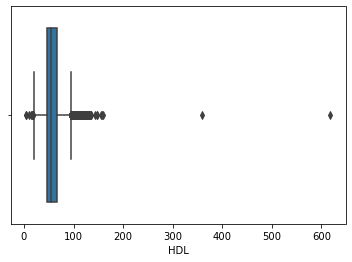

In [60]:
sns.boxplot(df['HDL'])

In [61]:
q1=df['HDL'].quantile(0.25)

In [62]:
q3=df['HDL'].quantile(0.75)

In [63]:
IQR=q3-q1

In [64]:
lower=q1-1.5*IQR

In [65]:
higher=q3+1.5*IQR

In [66]:
df=df[(df['HDL']>lower) & (df['HDL']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HDL'>

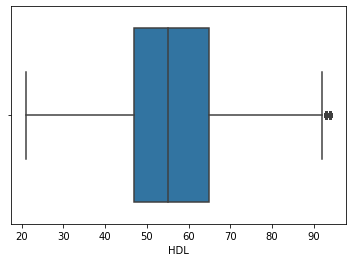

In [67]:
sns.boxplot(df['HDL'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AST'>

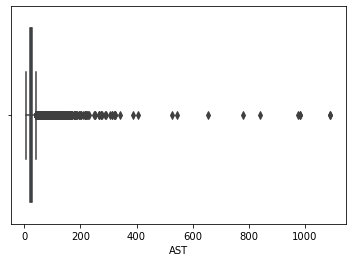

In [68]:
sns.boxplot(df['AST'])

In [69]:
q1=df['AST'].quantile(0.25)

In [70]:
q3=df['AST'].quantile(0.75)

In [71]:
IQR=q3-q1

In [72]:
lower=q1-1.5*IQR

In [73]:
higher=q3+1.5*IQR

In [74]:
df=df[(df['AST']>lower) & (df['AST']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AST'>

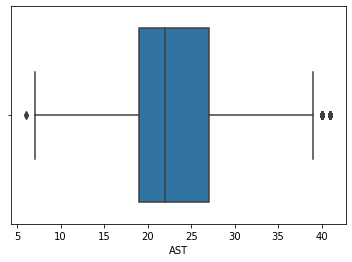

In [75]:
sns.boxplot(df['AST'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ALT'>

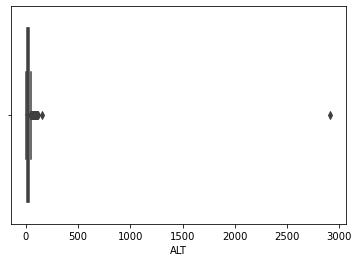

In [76]:
sns.boxplot(df['ALT'])

In [77]:
q1=df['ALT'].quantile(0.25)

In [78]:
q3=df['ALT'].quantile(0.75)

In [79]:
IQR=q3-q1

In [80]:
lower=q1-1.5*IQR

In [81]:
higher=q3+1.5*IQR

In [82]:
df=df[(df['ALT']>lower) & (df['ALT']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ALT'>

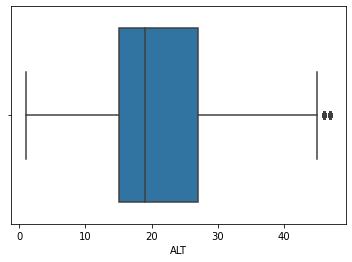

In [83]:
sns.boxplot(df['ALT'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gtp'>

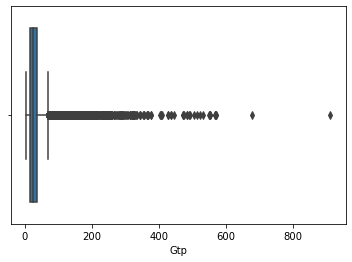

In [84]:
sns.boxplot(df['Gtp'])

In [85]:
q1=df['Gtp'].quantile(0.25)

In [86]:
q3=df['Gtp'].quantile(0.75)

In [87]:
IQR=q3-q1

In [88]:
lower=q1-1.5*IQR

In [89]:
higher=q3+1.5*IQR

In [90]:
df=df[(df['Gtp']>lower) & (df['Gtp']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gtp'>

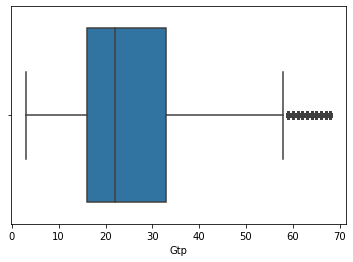

In [91]:
sns.boxplot(df['Gtp'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relaxation'>

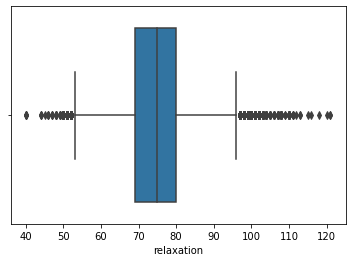

In [92]:
sns.boxplot(df['relaxation'])

In [93]:
q1=df['relaxation'].quantile(0.25)

In [94]:
q3=df['relaxation'].quantile(0.75)

In [95]:
IQR=q3-q1

In [96]:
lower=q1-1.5*IQR

In [97]:
higher=q3+1.5*IQR

In [98]:
df=df[(df['relaxation']>lower) & (df['relaxation']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relaxation'>

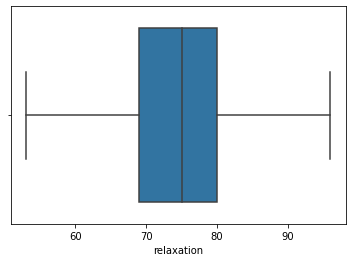

In [99]:
sns.boxplot(df['relaxation'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fasting blood sugar'>

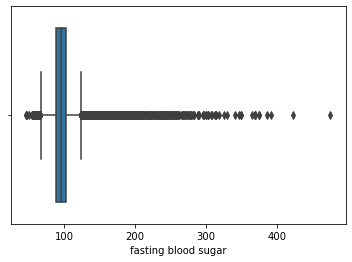

In [100]:
sns.boxplot(df['fasting blood sugar'])

In [101]:
q1=df['fasting blood sugar'].quantile(0.25)

In [102]:
q3=df['fasting blood sugar'].quantile(0.75)

In [103]:
IQR=q3-q1

In [104]:
lower=q1-1.5*IQR

In [105]:
higher=q3+1.5*IQR

In [106]:
df=df[(df['fasting blood sugar']>lower) & (df['fasting blood sugar']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fasting blood sugar'>

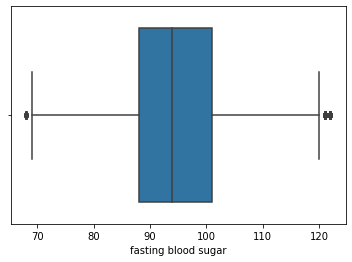

In [107]:
sns.boxplot(df['fasting blood sugar'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cholesterol'>

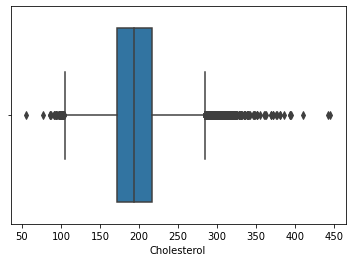

In [108]:
sns.boxplot(df['Cholesterol'])

In [109]:
q1=df['Cholesterol'].quantile(0.25)

In [110]:
q3=df['Cholesterol'].quantile(0.75)

In [111]:
IQR=q3-q1

In [112]:
lower=q1-1.5*IQR

In [113]:
higher=q3+1.5*IQR

In [114]:
df=df[(df['Cholesterol']>lower) & (df['Cholesterol']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cholesterol'>

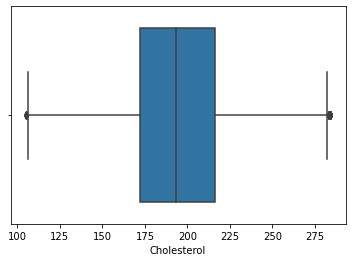

In [115]:
sns.boxplot(df['Cholesterol'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='triglyceride'>

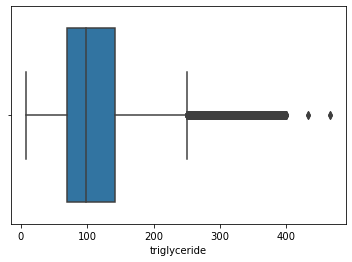

In [116]:
sns.boxplot(df['triglyceride'])

In [117]:
q1=df['triglyceride'].quantile(0.25)

In [118]:
q3=df['triglyceride'].quantile(0.75)

In [119]:
IQR=q3-q1

In [120]:
lower=q1-1.5*IQR

In [121]:
higher=q3+1.5*IQR

In [122]:
df=df[(df['triglyceride']>lower) & (df['triglyceride']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='triglyceride'>

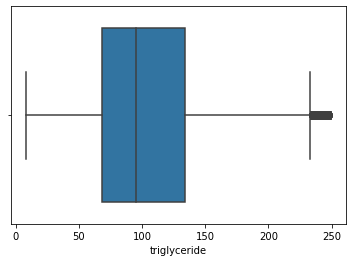

In [123]:
sns.boxplot(df['triglyceride'])

# Data Visualization

In [124]:
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
5,5,M,30,180,75,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,0
6,6,M,40,160,60,85.5,1.0,1.0,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


<AxesSubplot:xlabel='gender', ylabel='count'>

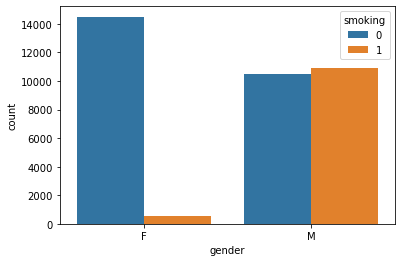

In [125]:
sns.countplot(x=df['gender'],hue=df['smoking'])

In [126]:
label_df=df.groupby(["gender","smoking"]).size().index


In [127]:
val_df=df.groupby(["gender","smoking"]).size().values


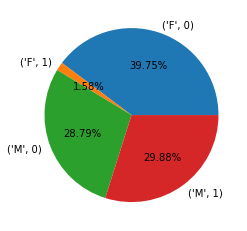

In [128]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='gender', ylabel='age'>

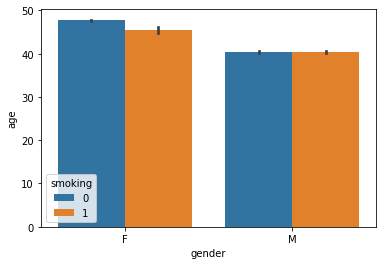

In [129]:
sns.barplot(x=df['gender'],y=df['age'],hue=df['smoking'])

In [130]:
label_df=df.groupby(["gender","smoking"])['age'].mean().index


In [131]:
val_df=df.groupby(["gender","smoking"])['age'].mean().values


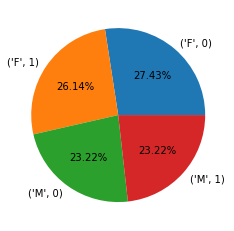

In [132]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='smoking', ylabel='age'>

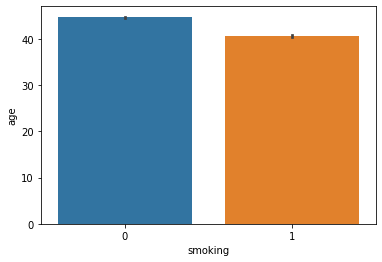

In [133]:
sns.barplot(x=df['smoking'],y=df['age'])

In [134]:
label_df=df.groupby(["smoking"])['age'].mean().index


In [135]:
val_df=df.groupby(["smoking"])['age'].mean().values


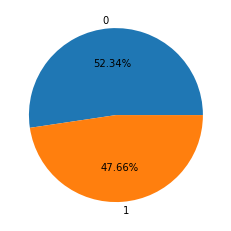

In [136]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [137]:
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
5,5,M,30,180,75,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,0
6,6,M,40,160,60,85.5,1.0,1.0,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [138]:
summary=df.groupby(['gender','smoking'])[['age','height(cm)','weight(kg)']].mean()



In [139]:
summary

age  height(cm)  weight(kg)
gender smoking                                   
F      0        47.678645  156.668506   56.068078
       1        45.434783  157.400000   55.965217
M      0        40.361394  169.581468   69.379583
       1        40.355144  169.895384   69.039644

<AxesSubplot:xlabel='gender,smoking'>

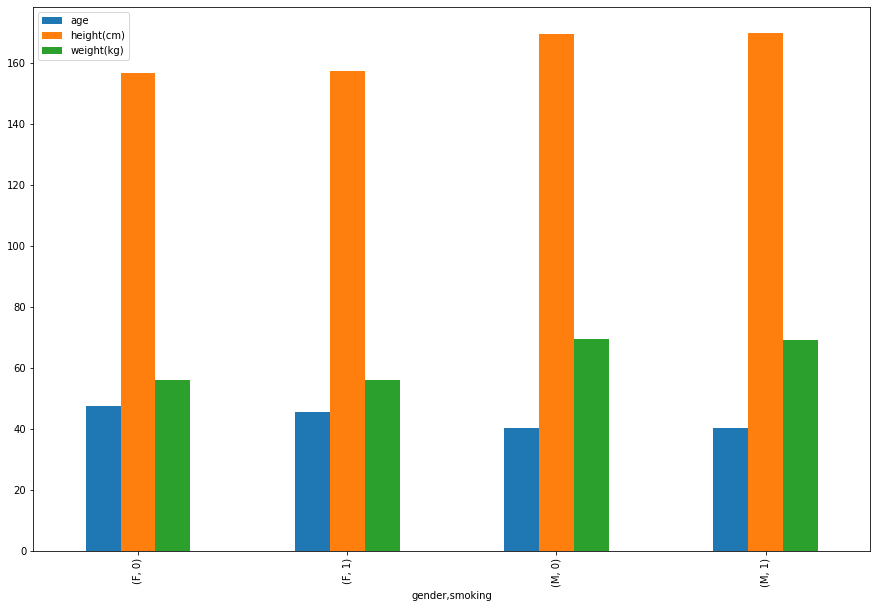

In [140]:
summary.plot(kind="bar",figsize=(15,10))


In [141]:
summary_df=df.groupby(['gender','smoking'])['eyesight(left)','eyesight(right)','hearing(left)','hearing(right)'].mean()

C:\Users\himanshu\AppData\Local\Temp\ipykernel_25764\3201429191.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summary_df=df.groupby(['gender','smoking'])['eyesight(left)','eyesight(right)','hearing(left)','hearing(right)'].mean()


<AxesSubplot:xlabel='gender,smoking'>

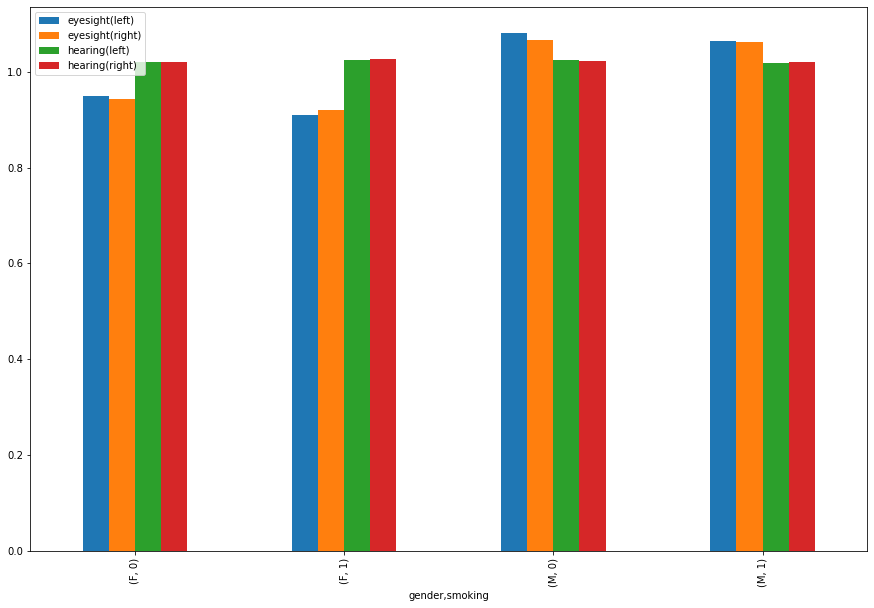

In [142]:
summary_df.plot(kind="bar",figsize=(15,10))

In [143]:
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,36471.000000,36471.000000,36471.000000,36471.000000,36471.000000,36471.000000,36471.000000,36471.000000,36471.000000,36471.000000,...,36471.000000,36471.000000,36471.000000,36471.000000,36471.000000,36471.000000,36471.000000,36471.000000,36471.000000,36471.000000
mean,27824.961997,43.348277,164.350032,63.774917,80.117680,1.021148,1.014233,1.021497,1.021195,119.199007,...,58.118999,114.969126,14.421878,1.068136,0.873595,22.194264,20.162156,24.978476,0.207096,0.314551
std,16092.923238,11.717999,8.529160,11.213538,8.353893,0.483905,0.470591,0.145035,0.144036,12.199722,...,12.934538,39.382235,1.567795,0.343520,0.205164,5.460571,8.352379,12.928217,0.405231,0.464343
min,0.000000,20.000000,150.000000,35.000000,58.100000,0.100000,0.100000,1.000000,1.000000,86.000000,...,21.000000,13.000000,4.900000,1.000000,0.100000,6.000000,1.000000,3.000000,0.000000,0.000000
25%,13861.000000,35.000000,155.000000,55.000000,74.000000,0.800000,0.800000,1.000000,1.000000,110.000000,...,49.000000,93.000000,13.400000,1.000000,0.700000,18.000000,14.000000,15.000000,0.000000,0.000000
50%,27859.000000,40.000000,165.000000,65.000000,80.000000,1.000000,1.000000,1.000000,1.000000,119.000000,...,57.000000,113.000000,14.600000,1.000000,0.900000,21.000000,18.000000,21.000000,0.000000,0.000000
75%,41802.000000,50.000000,170.000000,70.000000,86.000000,1.200000,1.200000,1.000000,1.000000,128.000000,...,67.000000,134.000000,15.600000,1.000000,1.000000,25.000000,25.000000,31.000000,0.000000,1.000000
max,55691.000000,75.000000,180.000000,100.000000,105.800000,9.900000,9.900000,2.000000,2.000000,156.000000,...,94.000000,1810.000000,20.400000,6.000000,10.000000,41.000000,47.000000,68.000000,1.000000,1.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

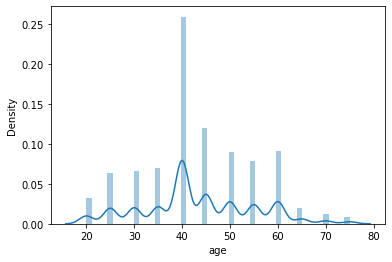

In [144]:
sns.distplot(df['age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='height(cm)', ylabel='Density'>

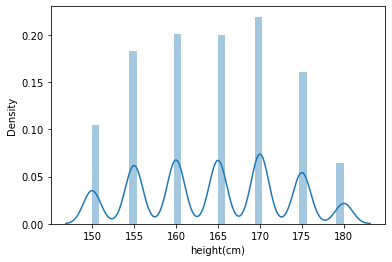

In [145]:
sns.distplot(df['height(cm)'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight(kg)', ylabel='Density'>

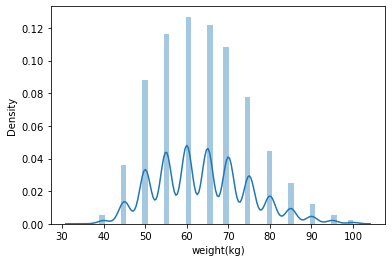

In [146]:
sns.distplot(df['weight(kg)'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDL', ylabel='Density'>

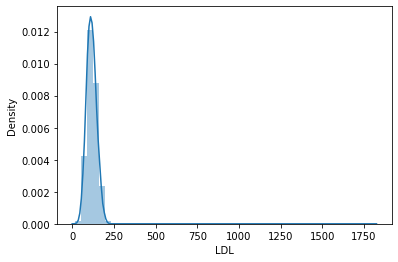

In [147]:
sns.distplot(df['LDL'])

In [148]:
df['LDL']=np.log(df['LDL'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDL', ylabel='Density'>

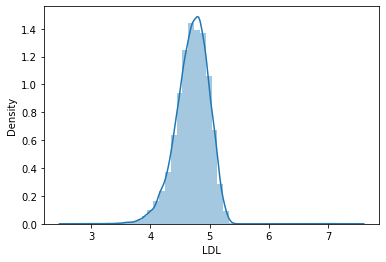

In [149]:
sns.distplot(df['LDL'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='eyesight(left)', ylabel='Density'>

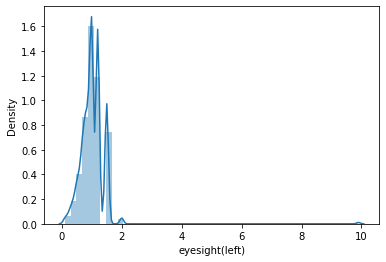

In [150]:
sns.distplot(df['eyesight(left)'])

In [151]:
df['eyesight(left)']=np.log(df['eyesight(left)'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='eyesight(left)', ylabel='Density'>

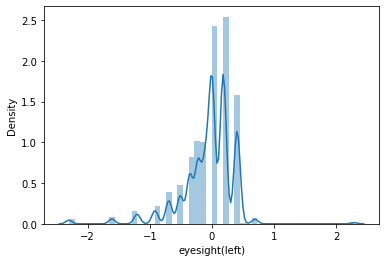

In [152]:
sns.distplot(df['eyesight(left)'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='eyesight(right)', ylabel='Density'>

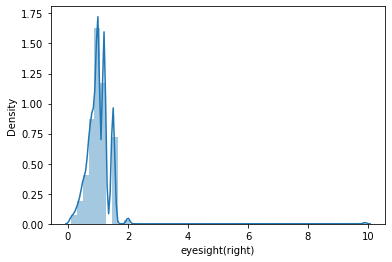

In [153]:
sns.distplot(df['eyesight(right)'])

In [154]:
df['eyesight(right)']=np.log(df['eyesight(right)'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='eyesight(right)', ylabel='Density'>

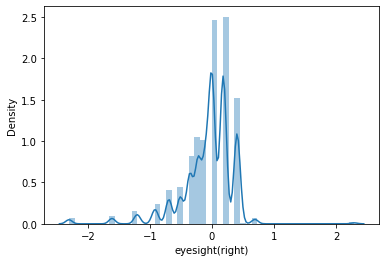

In [155]:
sns.distplot(df['eyesight(right)'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='triglyceride', ylabel='Density'>

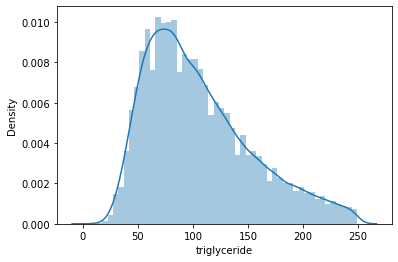

In [156]:
sns.distplot(df['triglyceride'])


In [157]:
le=LabelEncoder()


In [158]:
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,0.182322,0.000000,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
2,2,M,55,170,60,80.0,-0.223144,-0.223144,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
4,4,F,40,155,60,86.0,0.000000,0.000000,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
5,5,M,30,180,75,85.0,0.182322,0.182322,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,0
6,6,M,40,160,60,85.5,0.000000,0.000000,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,-0.105361,-0.105361,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,0.182322,0.182322,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,0.000000,0.182322,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,-0.223144,0.000000,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [159]:
df['gender']=le.fit_transform(df['gender'])


In [160]:
df['oral']=le.fit_transform(df['oral'])


In [161]:
df['tartar']=le.fit_transform(df['tartar'])


In [162]:
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,0,40,155,60,81.3,0.182322,0.000000,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,0,0,1,0
2,2,1,55,170,60,80.0,-0.223144,-0.223144,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,0,0,0,1
4,4,0,40,155,60,86.0,0.000000,0.000000,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0,0
5,5,1,30,180,75,85.0,0.182322,0.182322,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,0,0,1,0
6,6,1,40,160,60,85.5,0.000000,0.000000,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,0,40,170,65,75.0,-0.105361,-0.105361,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,0,1,1,0
55688,55681,0,45,160,50,70.0,0.182322,0.182322,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,0,0,1,0
55689,55683,0,55,160,50,68.5,0.000000,0.182322,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0,0
55690,55684,1,60,165,60,78.0,-0.223144,0.000000,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,0,0,0,0


In [163]:
y=df['smoking']

In [164]:
X=df.drop(['smoking','relaxation','LDL','AST','waist(cm)'],axis=1)

In [165]:
y

0        0
2        1
4        0
5        0
6        1
        ..
55687    0
55688    0
55689    0
55690    0
55691    1
Name: smoking, Length: 36471, dtype: int64

In [166]:
X

,ID,gender,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,ALT,Gtp,oral,dental caries,tartar
0,0,0,40,155,60,0.182322,0.000000,1.0,1.0,114.0,...,82.0,73.0,12.9,1.0,0.7,19.0,27.0,0,0,1
2,2,1,55,170,60,-0.223144,-0.223144,1.0,1.0,138.0,...,182.0,55.0,15.8,1.0,1.0,16.0,22.0,0,0,0
4,4,0,40,155,60,0.000000,0.000000,1.0,1.0,120.0,...,74.0,62.0,12.5,1.0,0.6,14.0,22.0,0,0,0
5,5,1,30,180,75,0.182322,0.182322,1.0,1.0,128.0,...,199.0,48.0,16.2,1.0,1.2,27.0,33.0,0,0,1
6,6,1,40,160,60,0.000000,0.000000,1.0,1.0,116.0,...,68.0,55.0,17.0,1.0,0.7,27.0,39.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,0,40,170,65,-0.105361,-0.105361,1.0,1.0,110.0,...,99.0,75.0,12.3,1.0,0.6,7.0,10.0,0,1,1
55688,55681,0,45,160,50,0.182322,0.182322,1.0,1.0,101.0,...,69.0,73.0,14.0,1.0,0.9,12.0,14.0,0,0,1
55689,55683,0,55,160,50,0.000000,0.182322,1.0,1.0,117.0,...,77.0,79.0,12.4,1.0,0.5,11.0,12.0,0,0,0
55690,55684,1,60,165,60,-0.223144,0.000000,1.0,1.0,133.0,...,79.0,48.0,14.4,1.0,0.7,19.0,18.0,0,0,0


In [167]:
sc=StandardScaler()


In [168]:
X=sc.fit_transform(X)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [170]:
X_train.shape

(29176, 22)

In [171]:
X_test.shape

(7295, 22)

In [172]:
lr=LogisticRegression()


In [173]:
lr.fit(X_train,y_train)

LogisticRegression()

In [174]:
y_pred=lr.predict(X_test)

In [175]:
accuracy_score(y_test,y_pred)

0.7509252912954079

In [177]:
confusion_matrix(y_test,y_pred)

array([[4161,  816],
       [1001, 1317]], dtype=int64)

In [178]:
rfc=RandomForestClassifier()


In [179]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [180]:
y_pred=rfc.predict(X_test)

In [181]:
accuracy_score(y_test,y_pred)

0.82960932145305

Text(0.5, 0, 'Feature Importance')

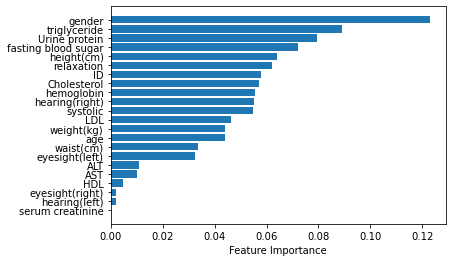

In [182]:
sort = rfc.feature_importances_.argsort()
plt.barh(df.columns[sort], rfc.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [183]:
dtc=DecisionTreeClassifier()


In [184]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [185]:
y_pred=dtc.predict(X_test)

In [186]:
accuracy_score(y_test,y_pred)

0.7688827964359151

Text(0.5, 0, 'Feature Importance')

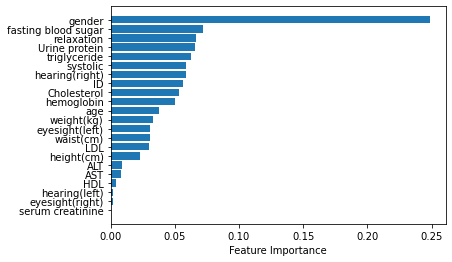

In [187]:
sort = dtc.feature_importances_.argsort()
plt.barh(df.columns[sort], dtc.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [188]:
knc=KNeighborsClassifier()


In [189]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [190]:
y_pred=knc.predict(X_test)

In [191]:
accuracy_score(y_test,y_pred)

0.7457162440027416